# Credit Card Fraud Detection

# Objective

The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions.

# Dataset Attributes

**Transaction_ID**: Unique identifier for each credit card transaction.

**Card_Type:** Type of credit card used in the transaction (Visa, Mastercard, RuPay, American
Express).

**Merchant_Category**: Category of the merchant where the transaction took place (Retail, Online Shopping, Dining, Entertainment, Healthcare, Education, Transportation, Utility bill).

**Transaction_Amount**: The amount of money involved in the transaction.

**Transaction_DateTime**: Date and Time of the transaction.

**Location**: City where the transaction occurred (Mumbai, Delhi, Bengaluru, Kolkata, Chennai,
Hyderabad, Kochi, Pune, Ahmedabad, Surat, Jaipur, Lucknow, Patna).

**Region**: Region where the transaction occurred (North, South, West, East).

**Cardholder_Age**: Age of the Cardholder in years.

**Cardholder_Gender**: Gender of the cardholder (Male or Female).

**Cardholder_Monthly_Income**: Monthly income of the cardholder.

**Cardholder_Average_Spend**: The average amount spent by the cardholder.

**Credit_Limit**: Maximum amount of credit extended to the cardholder by the issuing bank (50000,100000, 150000, 200000).

**Device_Type**: Type of device used for the transaction (Mobile, Desktop, Point-of-Sale Terminal,Contactless Payment Device, Unknown).

**Day_of_Week**: Day of the week when the transaction took place.
Is_Fraudulent Indicator of whether the transaction is fraudulent or not (Yes/No).


# Importing Packages and Loading Dataset

In [1]:
## Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Creating Dataframe and loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv ')
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


In [3]:
## Viewing first few lines of the Dataset
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [4]:
## Viewing last few lines of the Dataset
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [8]:
## Basic understanding of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

# Exploratory Data Analysis(EDA)


In [9]:
## # Cloning Dataset
df1=df.copy()
df1

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


In [10]:
df1.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [11]:
## Basic understanding of Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [12]:
## Viewing Dataset Shape
df1.shape

(5000, 15)

In [13]:
# Finding Missing values
df1.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [14]:
# Missing columns
missing_cols = df1.columns[df1.isnull().sum() > 0]
print(missing_cols)

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type'],
      dtype='object')


In [16]:
## Printing Numerical Missing Values
Numerical_missing_values = {"Numerical": df1.select_dtypes(include=['number']).isnull().sum().loc[lambda x:x > 0]}
print(Numerical_missing_values)

{'Numerical': Transaction_Amount             6
Cardholder_Age               135
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
dtype: int64}


In [17]:
## Printing Categorical Missing Values
Categorical_missing_values ={"Categorical": df1.select_dtypes(include=['object']).isnull().sum().loc[lambda x:x > 0]}
print(Categorical_missing_values)

{'Categorical': Card_Type            17
Merchant_Category    22
Cardholder_Gender    89
Device_Type          40
dtype: int64}


In [18]:
# Checking unique values in each column
df1.nunique()

,0
Transaction_ID,5000
Card_Type,4
Merchant_Category,8
Transaction_Amount,4873
Transaction_DateTime,5000
Location,13
Region,4
Cardholder_Age,63
Cardholder_Gender,2
Cardholder_Monthly_Income,4628


In [19]:
# Checking Duplicates
df1.duplicated().sum()

0

In [20]:
# Finding categorical columns with unique value counts
categorical_columns = df1.columns[df1.nunique() < 10]
for col in categorical_columns:
  print(f"Unique values in '{col}': {df1[col].unique()}")

Unique values in 'Card_Type': ['Mastercard' 'American Express' 'Visa' 'RuPay' nan]
Unique values in 'Merchant_Category': ['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]
Unique values in 'Region': ['East' 'West' 'North' 'South']
Unique values in 'Cardholder_Gender': ['Female' 'Male' nan]
Unique values in 'Credit_Limit': [100000. 150000. 200000.  50000.     nan]
Unique values in 'Device_Type': ['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device' nan]
Unique values in 'Day_of_Week': ['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']
Unique values in 'Is_Fraudulent': ['No' 'Yes']


In [ ]:
for col in df1.select_dtypes(include=['object']).columns:
  print(f"Value counts for {col}: \n{df1[col].value_counts()}\n")

Value counts for Transaction_ID: 
Transaction_ID
W963UK57    1
R295OK60    1
W909ES10    1
I854VI75    1
L709SZ79    1
           ..
L517PL65    1
W103JT18    1
R305EF32    1
R470GA64    1
D501WH15    1
Name: count, Length: 5000, dtype: int64

Value counts for Card_Type: 
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64

Value counts for Merchant_Category: 
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64

Value counts for Transaction_DateTime: 
Transaction_DateTime
2020-01-01 09:43:17    1
2022-09-03 14:43:18    1
2022-09-06 14:43:37    1
2022-09-06 12:48:12    1
2022-09-05 20:15:26    1
                      ..
2021-05-12 18:02:34    1
2021-05-12 10:08:04    1
2021-05-12 08:09:17    1
2021-05-12 02:03:46    1
2023-

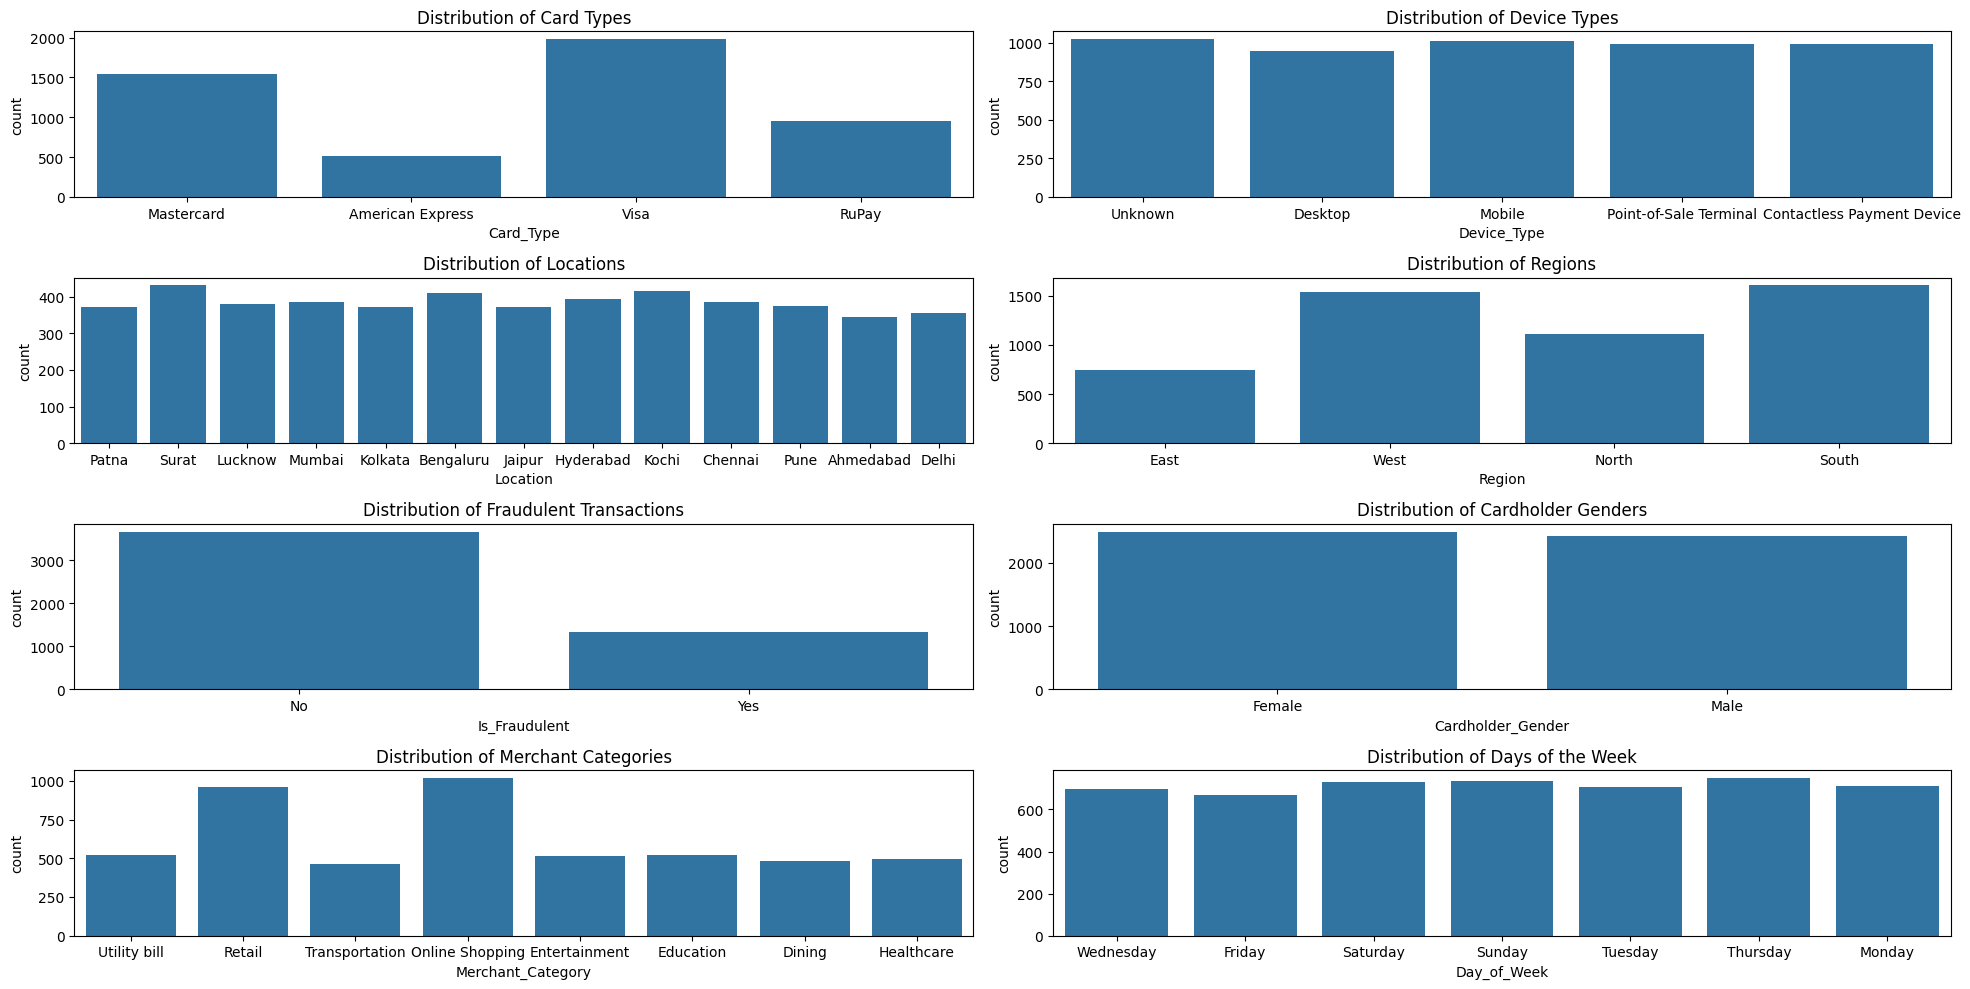

In [21]:
# Analyzing distribution of categorical columns using plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
axes = axes.flatten()
sns.countplot(data=df1, x='Card_Type', ax=axes[0])
axes[0].set_title('Distribution of Card Types')
sns.countplot(data=df1, x='Device_Type', ax=axes[1])
axes[1].set_title('Distribution of Device Types')
sns.countplot(data=df1, x='Location', ax=axes[2])
axes[2].set_title('Distribution of Locations')
sns.countplot(data=df1, x='Region', ax=axes[3])
axes[3].set_title('Distribution of Regions')
sns.countplot(data=df1, x='Is_Fraudulent', ax=axes[4])
axes[4].set_title('Distribution of Fraudulent Transactions')
sns.countplot(data=df1, x='Cardholder_Gender', ax=axes[5])
axes[5].set_title('Distribution of Cardholder Genders')
sns.countplot(data=df1, x='Merchant_Category', ax=axes[6])
axes[6].set_title('Distribution of Merchant Categories')
sns.countplot(data=df1, x='Day_of_Week', ax=axes[7])
axes[7].set_title('Distribution of Days of the Week')
plt.tight_layout()
plt.show()

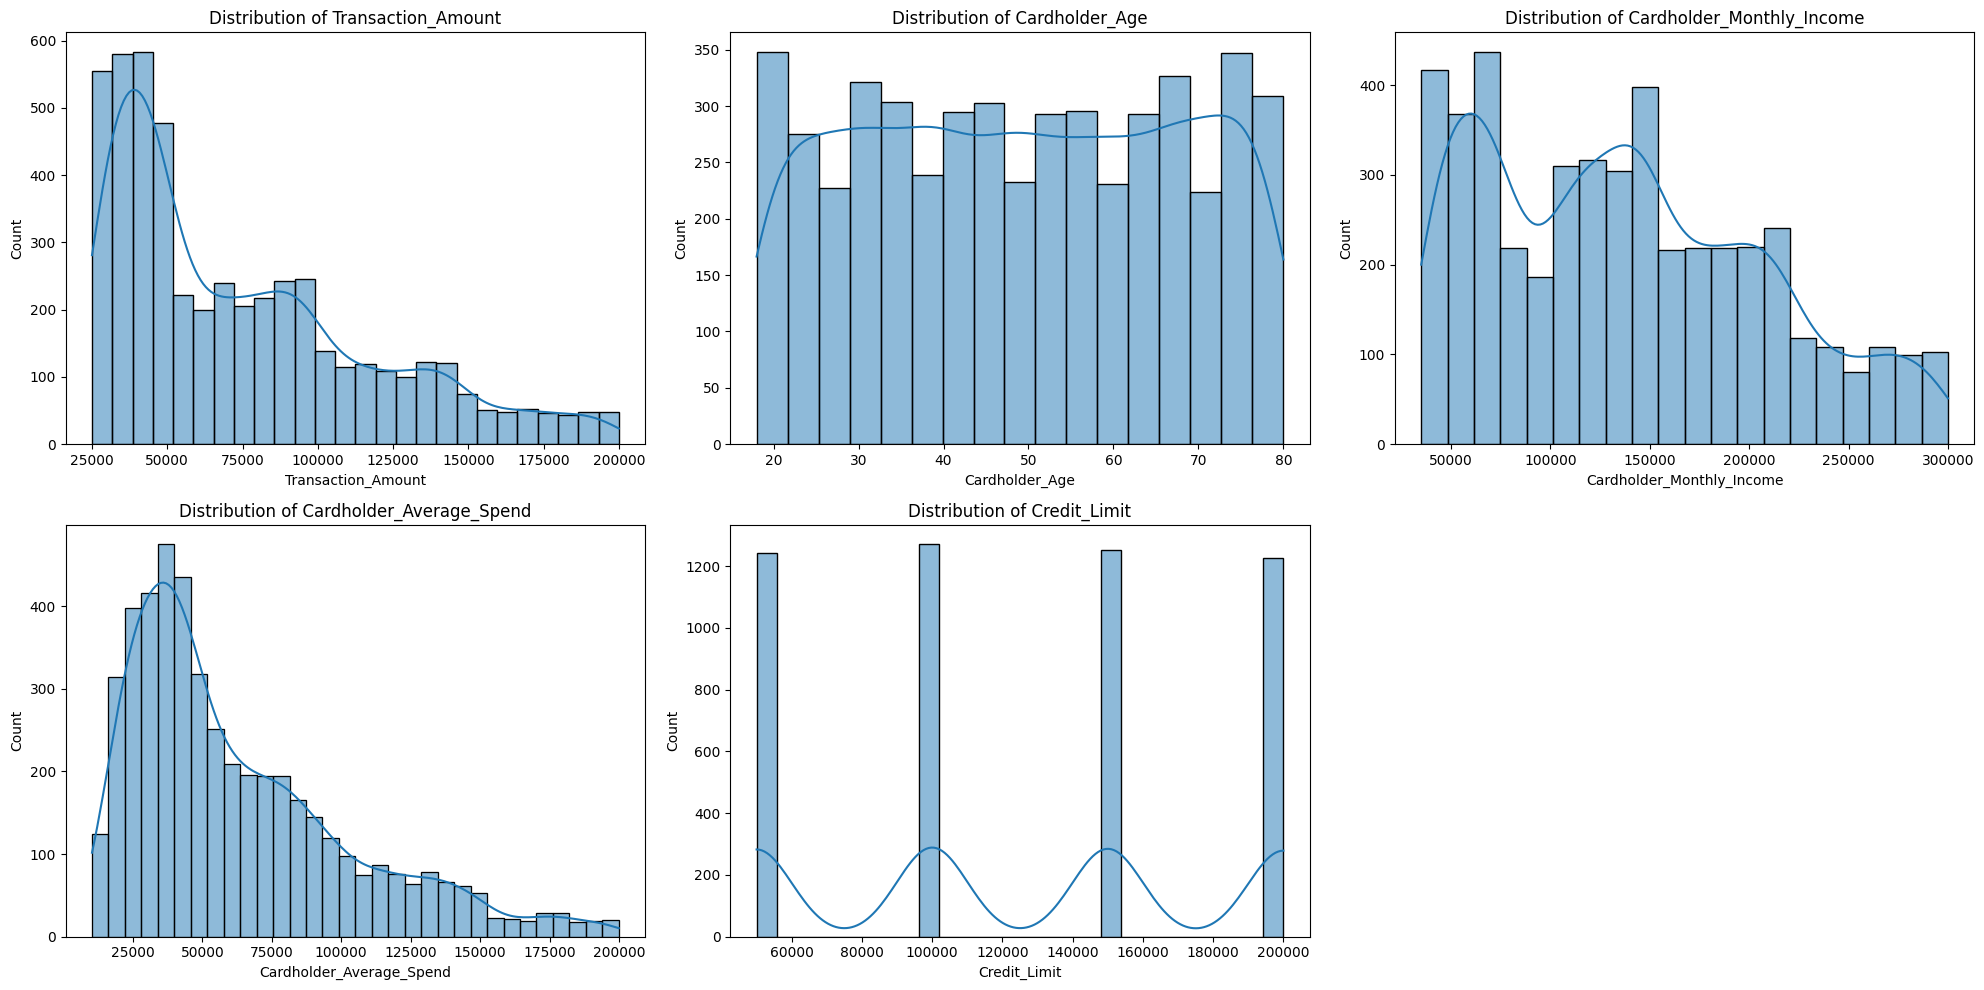

In [22]:
# Analyzing Numerical columns with discribtive statistics
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
numerical_columns = df1.select_dtypes(include=['number']).columns
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df1, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

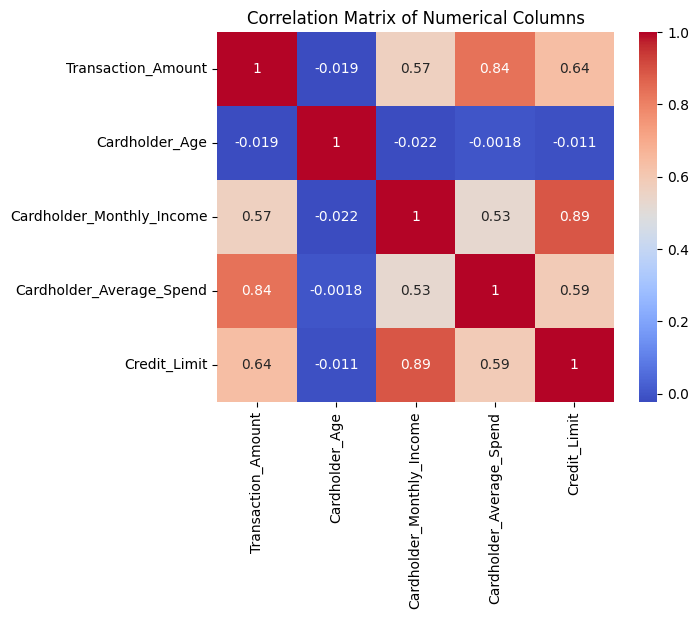

In [23]:
# Correlation between Numerical columns
sns.heatmap(df1[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

<Figure size 1500x1000 with 0 Axes>

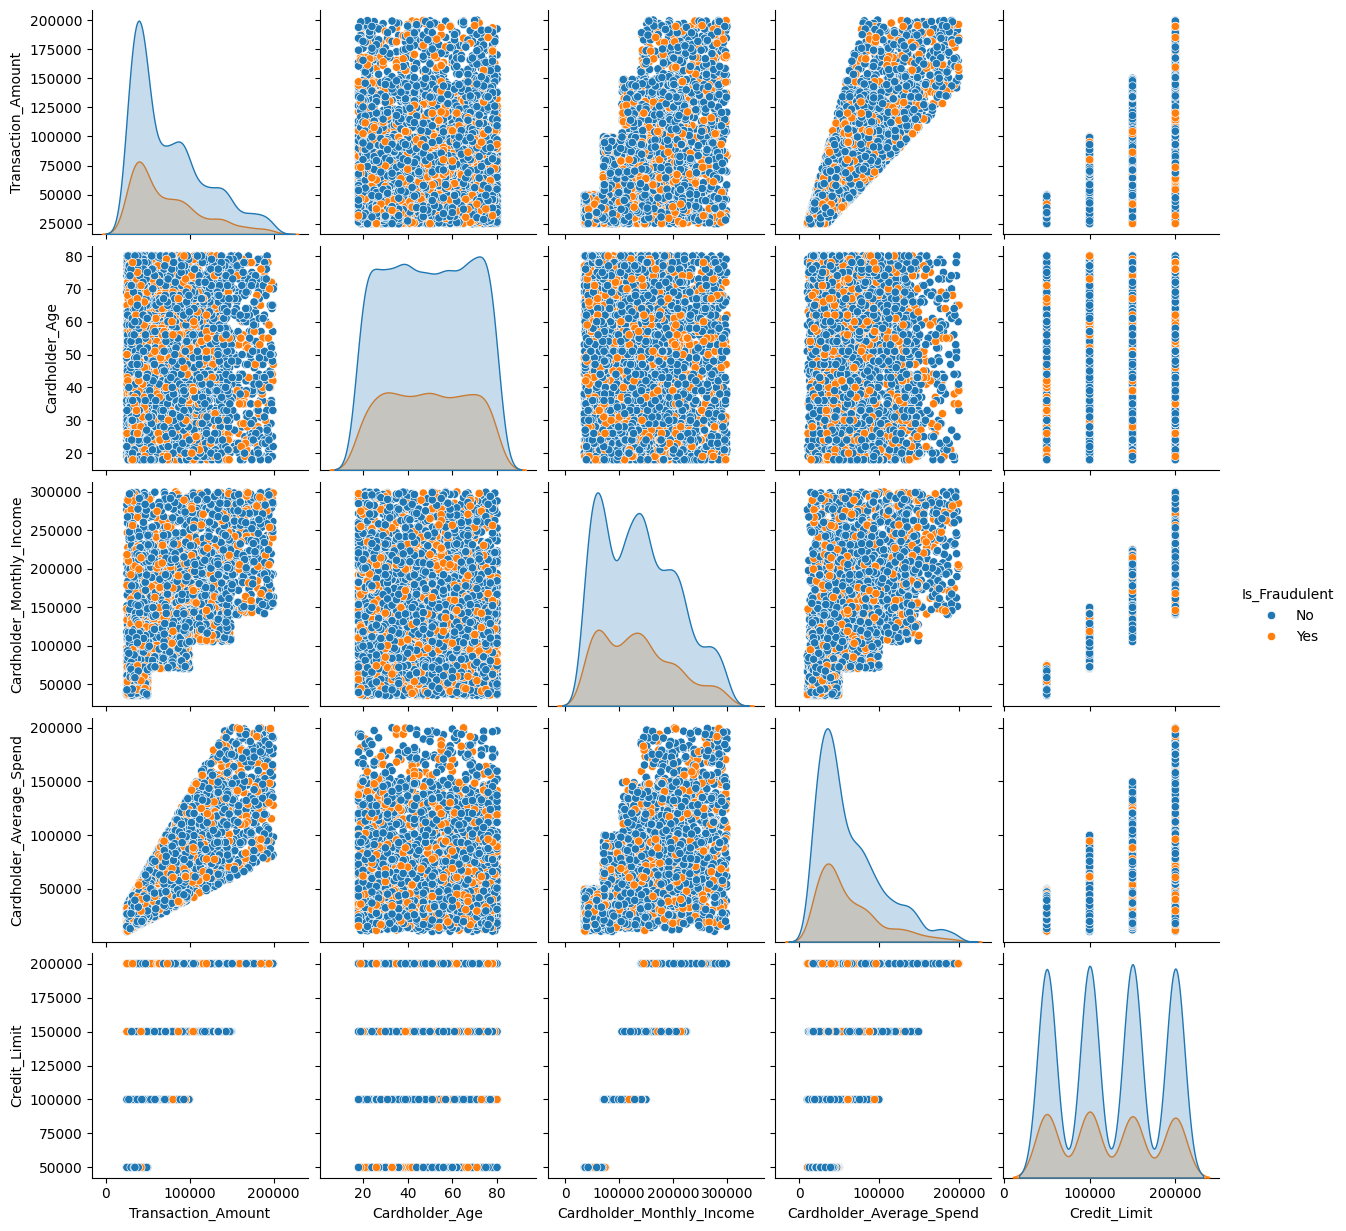

In [24]:
# Conduct bivariate and multivariate analysis
plt.figure(figsize=(15, 10))
sns.pairplot(df1, hue='Is_Fraudulent')
plt.show()

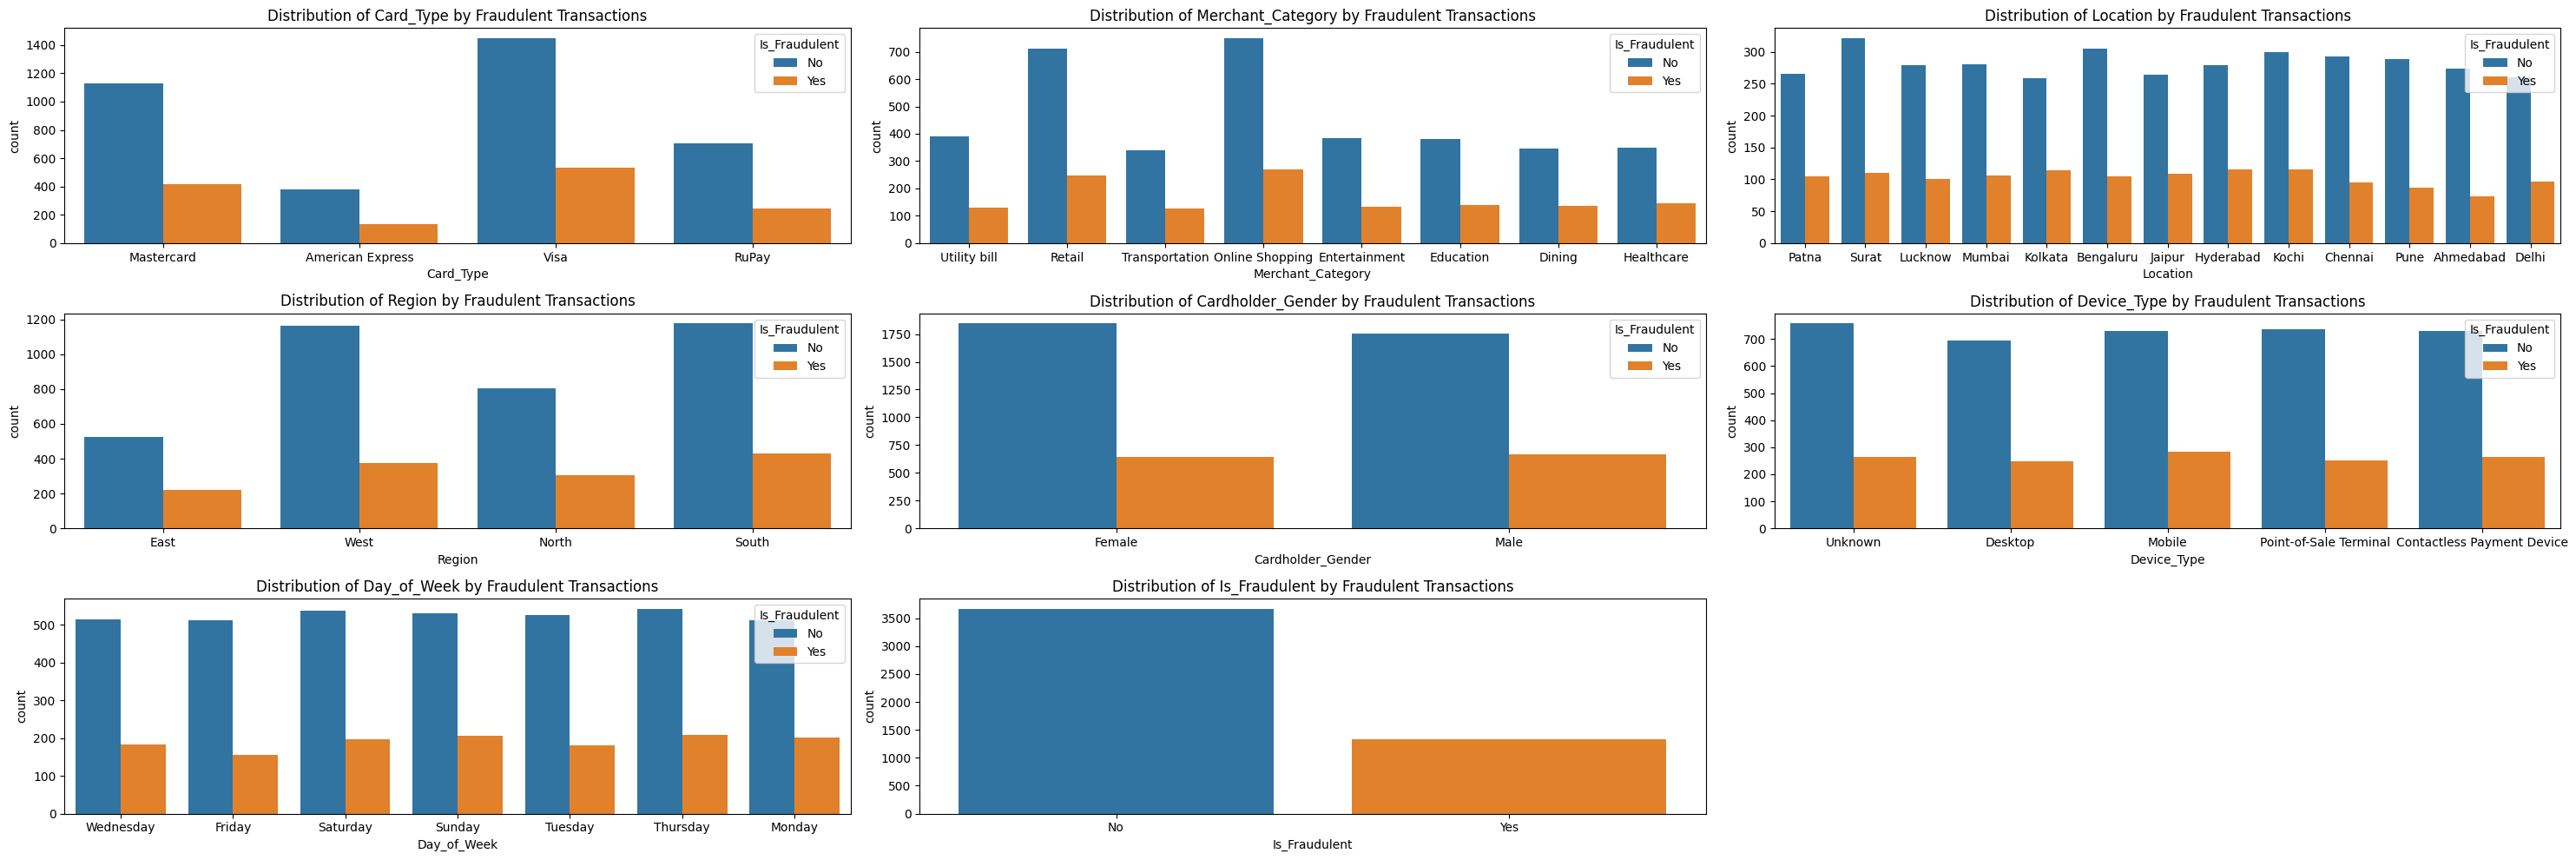

In [25]:
# Correlation between Categorical fetures with Fraud
categorical_columns = df1.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in ['Transaction_ID', 'Transaction_DateTime']]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df1, x=col, hue='Is_Fraudulent', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Fraudulent Transactions')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

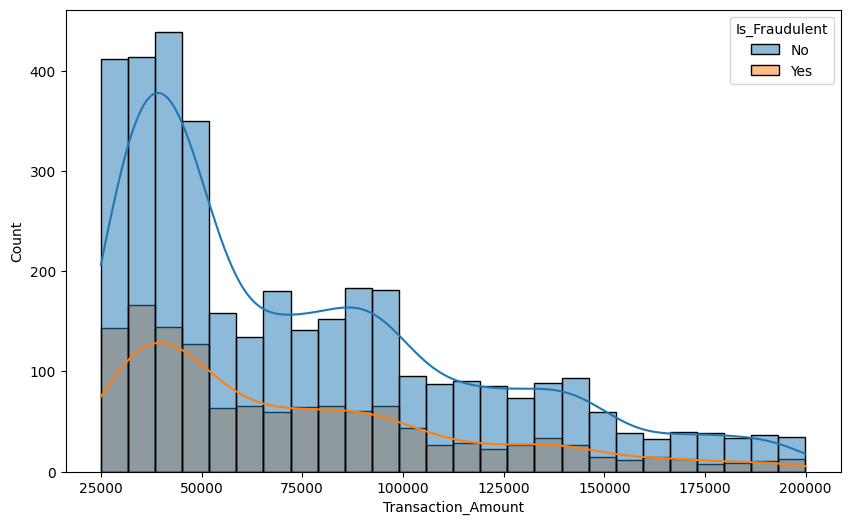

In [26]:
# Visualize the distribution of transaction amount for fraudulent vs non-fraudulent
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Transaction_Amount', hue='Is_Fraudulent', kde=True)
plt

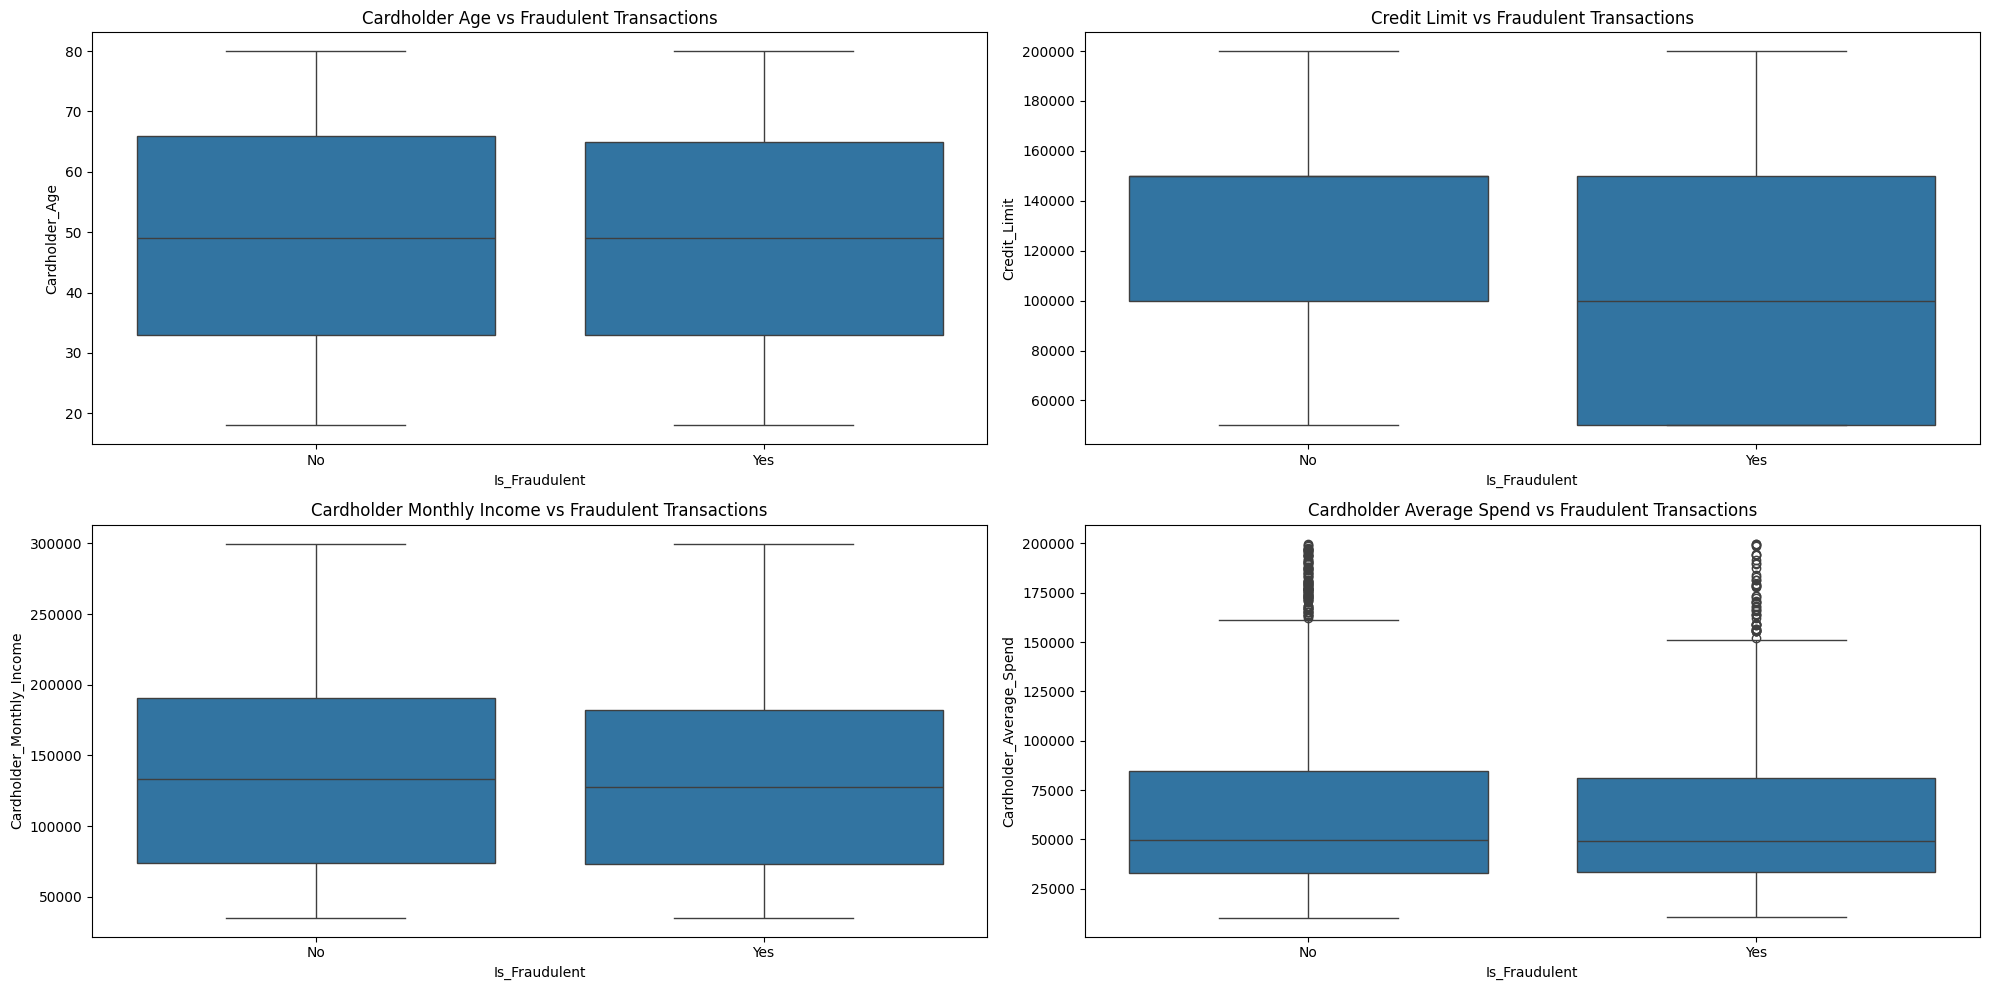

In [27]:
# Investigate whether certain features are more susceptible to fraud.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()
sns.boxplot(data=df1, x='Is_Fraudulent', y='Cardholder_Age', ax=axes[0])
axes[0].set_title('Cardholder Age vs Fraudulent Transactions')
sns.boxplot(data=df1, x='Is_Fraudulent', y='Credit_Limit', ax=axes[1])
axes[1].set_title('Credit Limit vs Fraudulent Transactions')
sns.boxplot(data=df1, x='Is_Fraudulent', y='Cardholder_Monthly_Income', ax=axes[2])
axes[2].set_title('Cardholder Monthly Income vs Fraudulent Transactions')
sns.boxplot(data=df1, x='Is_Fraudulent', y='Cardholder_Average_Spend', ax=axes[3])
axes[3].set_title('Cardholder Average Spend vs Fraudulent Transactions')
plt.tight_layout()
plt.show()


**Observation:**

None of the variables show a strong difference between fraudulent and non-fraudulent transactions.

Outliers exist in spending and income, suggesting that some individuals have significantly higher spending patterns.

## Handling Missing Values

In [28]:
# Impute missing value by KNN Imputation for numerical columns
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df1[df1.select_dtypes(include=['number']).columns]= knn_imputer.fit_transform(df1.select_dtypes(include=['number']))
print(df1)

     Transaction_ID         Card_Type Merchant_Category  Transaction_Amount  \
0          W963UK57        Mastercard      Utility bill             27214.0   
1          V606KV56  American Express            Retail             83956.0   
2          R531NU70              Visa    Transportation            193280.0   
3          T783GF79             RuPay   Online Shopping            167381.0   
4          K256ZN73             RuPay            Retail             81170.0   
...             ...               ...               ...                 ...   
4995       N307EM82             RuPay         Education             36508.0   
4996       J752EG45  American Express   Online Shopping             42920.0   
4997       S458OS59              Visa        Healthcare             33788.0   
4998       E863PD98             RuPay     Entertainment             38679.0   
4999       D501WH15              Visa        Healthcare             34672.0   

     Transaction_DateTime Location Region  Cardhold

In [29]:
## Finding Missing Value
df1.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,89
Cardholder_Monthly_Income,0


In [30]:
# Mode imputation for Categorical columns
for col in df1.select_dtypes(include=['object']).columns:
  df1[col].fillna(df1[col].mode()[0], inplace= True)

<ipython-input-30-29076e97ac36>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace= True)


In [31]:
df1.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


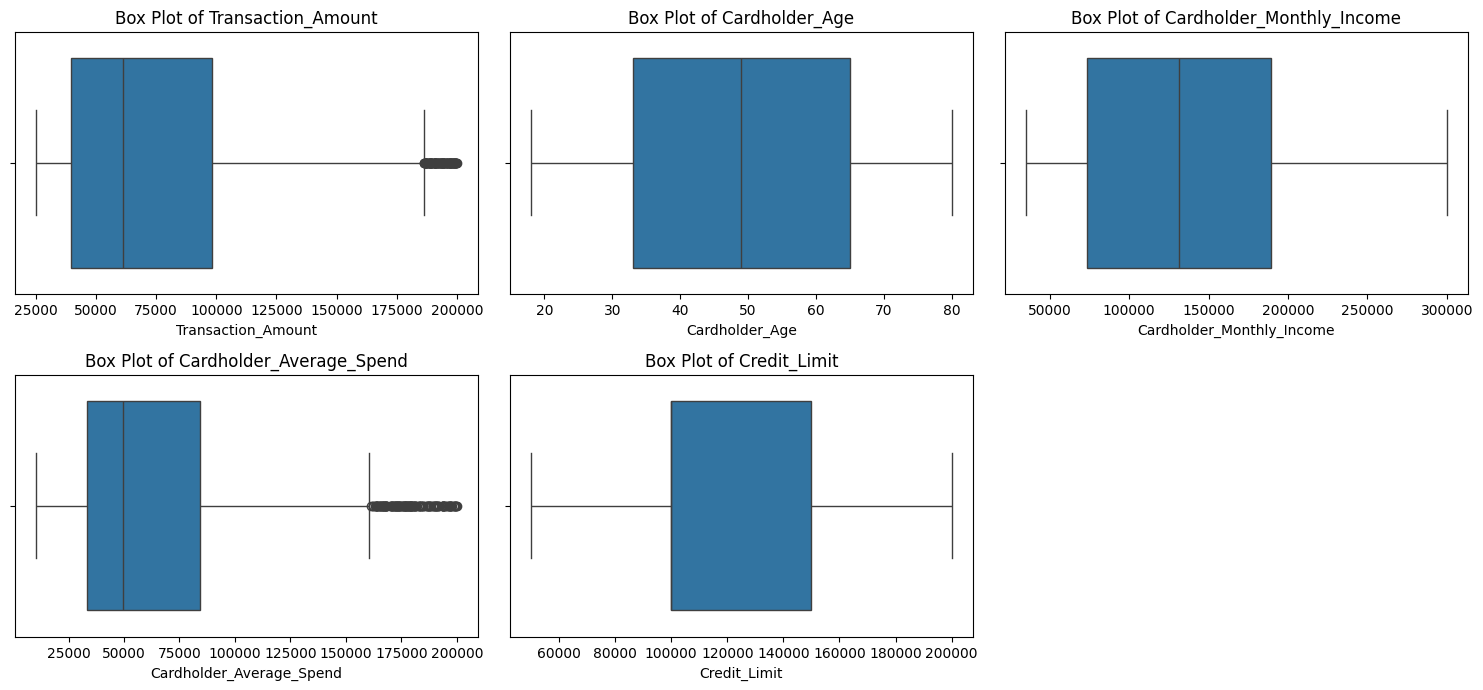

In [32]:
#Finding outliers through box plot for nemerical columns
numerical_columns = df1.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df1, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


As per the above box plot Outliers present in cardholder_average_spend and Transaction_Amount columns. we can also identify and remove outliers using IQR - Inter Quartile Range

In [34]:
# Check for outliers in numerical features using statistical methods IQR (Interquartile Range)
Q1 = df1['Cardholder_Average_Spend'].quantile(0.25)
Q3 = df1['Cardholder_Average_Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
Q1 = df1['Transaction_Amount'].quantile(0.25)
Q3 = df1['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

In [36]:
#  Removing outliers
df1_Outliers = df1[(df1['Cardholder_Average_Spend'] >= lower_bound) & (df1['Cardholder_Average_Spend'] <= upper_bound)]
df1_Outliers_removed = df1_Outliers[(df1_Outliers['Transaction_Amount'] >= lower_bound) | (df1_Outliers['Transaction_Amount'] <= upper_bound)]
print(f"\nNo.of rows after removal of Outliers: {df1_Outliers_removed.shape[0]}")


No.of rows after removal of Outliers: 4854


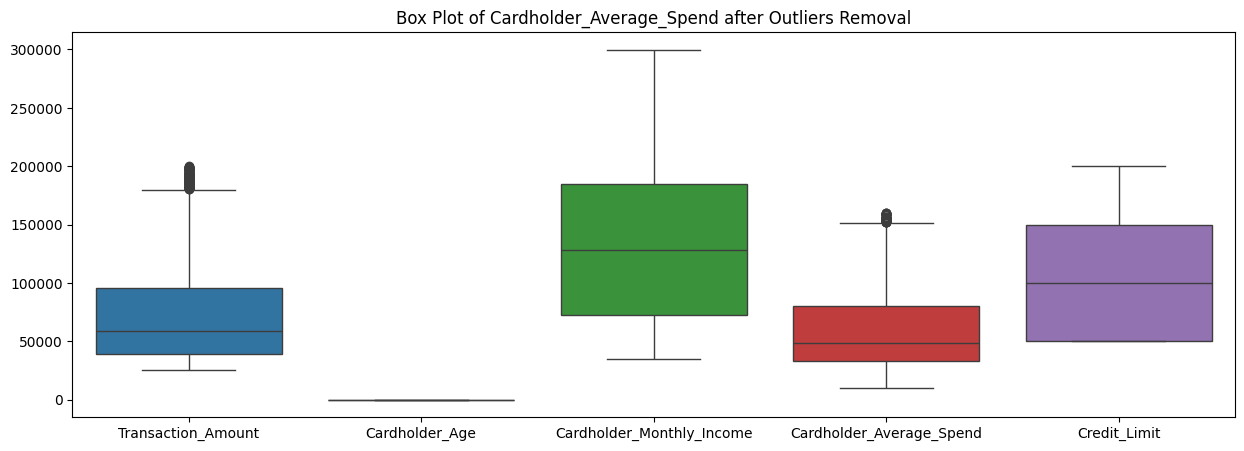

In [37]:
# Boxplot visual after Outliers removal
plt.figure(figsize=(15, 5))
sns.boxplot(data=df1_Outliers_removed)
plt.title('Box Plot of Cardholder_Average_Spend after Outliers Removal')
plt.show()

In [38]:
df1_Outliers_removed.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,71979.207911,49.150103,134652.116358,59736.960546,122330.037083
std,40574.071061,18.213183,68074.311270,34948.350189,54900.294168
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39423.250000,33.000000,72429.750000,32927.135000,50000.000000
50%,59017.500000,49.000000,128243.000000,48425.105000,100000.000000
75%,95450.250000,65.000000,184357.500000,80567.690000,150000.000000
max,199923.000000,80.000000,299875.000000,160324.240000,200000.000000


<Axes: xlabel='Transaction_Amount_log', ylabel='Density'>

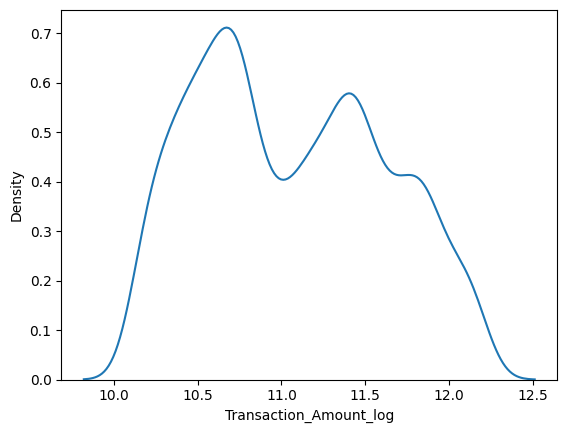

In [39]:
# Log Transformation
df1['Transaction_Amount_log'] = np.log(df1['Transaction_Amount'])
df1['Cardholder_Average_Spend_log'] = np.log(df1['Cardholder_Average_Spend'])
df1['Cardholder_Monthly_Income_log'] = np.log(df1['Cardholder_Monthly_Income'])

# Square-root Transformation
df1['Transaction_Amount_sqrt'] = np.sqrt(df1['Transaction_Amount'])
df1['Cardholder_Average_Spend_sqrt'] = np.sqrt(df1['Cardholder_Average_Spend'])
df1['Cardholder_Monthly_Income_sqrt'] = np.sqrt(df1['Cardholder_Monthly_Income'])
sns.kdeplot(df1['Transaction_Amount_log'])


As per the above KDPlot it clearly represents that the right side skewness present the below columns Transaction_Amount, Cardholder_Average_Spend, Cardholder_Monthly_Income. Inorder to remove the skewness i'm applying Log or squar root Transformation to improve the distribution of above three columns.

# Skewness

In [40]:
from sklearn.neighbors import KernelDensity
df2 = df1_Outliers_removed.copy()
df2.shape

(4854, 15)

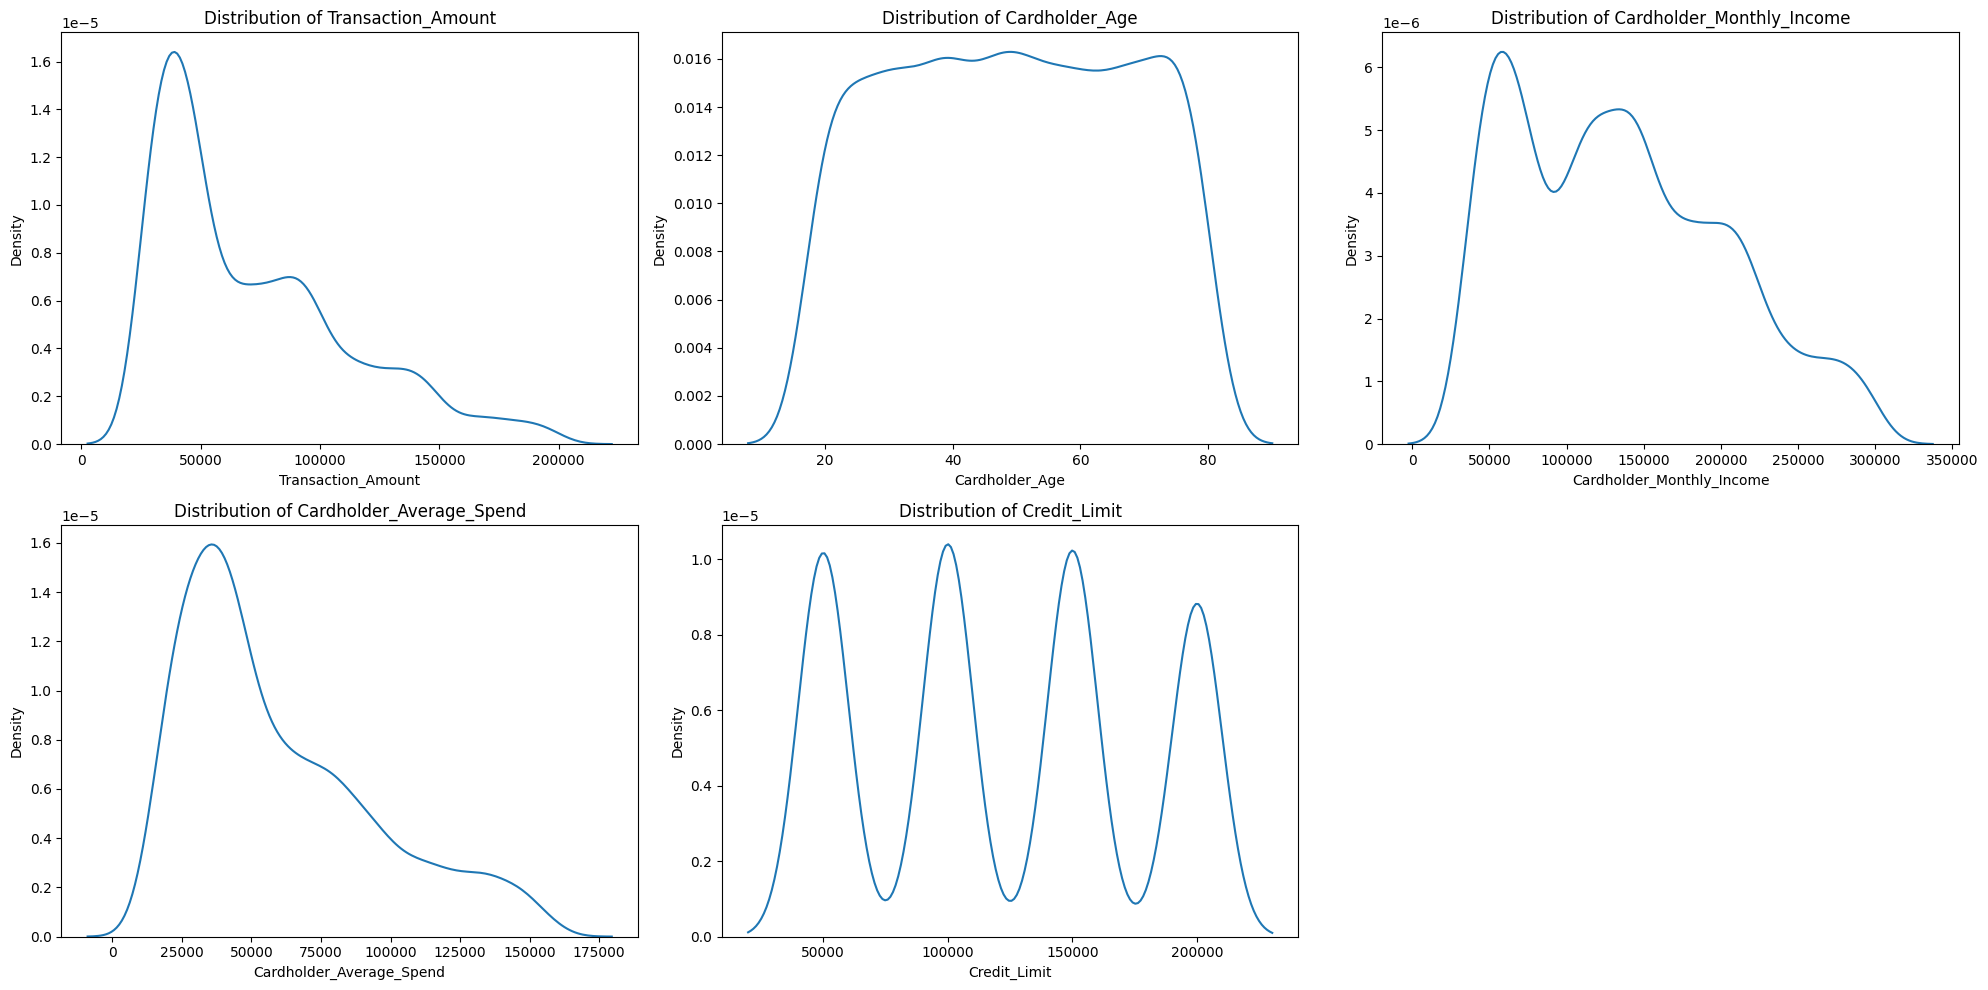

In [41]:
# Finding skewness in Numerical columns by KernalDensity plot
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
numerical_columns = df2.select_dtypes(include=['number']).columns
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df2, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j, range in enumerate(range(i+1, len(axes))):
    figure.delaxes(axes[range])
plt.tight_layout()
plt.show()

In [42]:
# Calcualting skewness score for numerical columns
numerical_columns = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
skewness = df2[numerical_columns].skew()
print(skewness)

Transaction_Amount           1.005559
Cardholder_Age              -0.010684
Cardholder_Monthly_Income    0.449875
Cardholder_Average_Spend     0.912273
dtype: float64


In [43]:
# Log Transformation
Transaction_Amount_log = np.log(df2['Transaction_Amount']).skew()
Cardholder_Average_Spend_log = np.log(df2['Cardholder_Average_Spend']).skew()
Cardholder_Monthly_Income_log = np.log(df2['Cardholder_Monthly_Income']).skew()
print(f"Log Transformation: {Transaction_Amount_log}, {Cardholder_Average_Spend_log}, {Cardholder_Monthly_Income_log}")

Log Transformation: 0.21900742693074512, -0.06986670548727932, -0.35803257333984395


In [44]:
# Square-root Transformation
Transaction_Amount_sqrt = np.sqrt(df2['Transaction_Amount']).skew()
Cardholder_Average_Spend_sqrt = np.sqrt(df2['Cardholder_Average_Spend']).skew()
Cardholder_Monthly_Income_sqrt = np.sqrt(df2['Cardholder_Monthly_Income']).skew()
print(f"Squar-root Transformation: {Transaction_Amount_sqrt}, {Cardholder_Average_Spend_sqrt}, {Cardholder_Monthly_Income_sqrt}")

Squar-root Transformation: 0.5975630490125663, 0.4524836359135308, 0.04646321278299057


<Axes: xlabel='Transaction_Amount_log', ylabel='Density'>

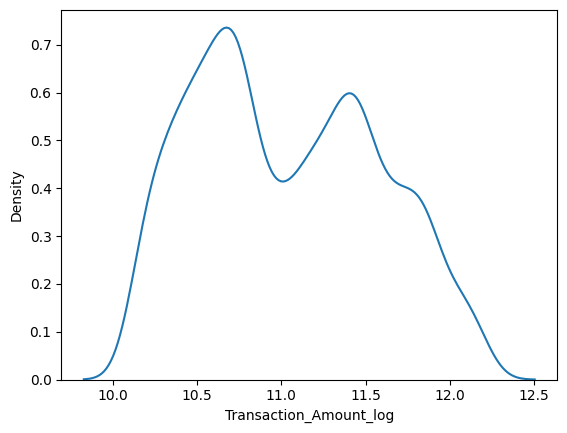

In [45]:
# Comparing Log and Squre root transformation by kdplot
df2['Transaction_Amount_log'] = np.log(df2['Transaction_Amount'])
sns.kdeplot(df2['Transaction_Amount_log'])

In [46]:
df2['Transaction_Amount_log'] = np.log(df2['Transaction_Amount'])
df2['Cardholder_Average_Spend_log'] = np.log(df2['Cardholder_Average_Spend'])
df2['Cardholder_Monthly_Income_sqrt'] = np.sqrt(df2['Cardholder_Monthly_Income'])

# Feature Engineering

In [47]:
#Finding categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')


In [48]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])
df2

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_log,Cardholder_Monthly_Income_sqrt
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,No,10.211487,10.501490,307.623146
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,No,11.338048,11.398402,384.861014
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,39.2,1,210921.0,106668.60,200000.0,1,2,No,12.171895,11.577482,459.261363
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,No,11.304301,10.872619,417.696062
5,I812SG19,2,2,131918.0,2020-01-04 19:55:12,9,3,80.0,1,166671.0,80393.44,150000.0,3,2,No,11.789936,11.294688,408.253598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,2,1,36508.0,2023-12-29 09:22:23,3,1,33.0,0,63015.0,34192.55,50000.0,0,0,Yes,10.505287,10.439763,251.027887
4996,J752EG45,0,4,42920.0,2023-12-29 19:59:13,2,2,52.0,0,115859.6,19680.39,100000.0,0,0,No,10.667093,9.887378,340.381551
4997,S458OS59,3,3,33788.0,2023-12-30 07:06:38,11,3,56.0,1,60868.0,33876.96,50000.0,1,2,No,10.427861,10.430490,246.714410
4998,E863PD98,2,2,38679.0,2023-12-30 07:50:02,2,2,60.0,1,66948.0,32988.22,50000.0,1,2,No,10.563052,10.403906,258.743116


In [49]:
# Time stamp columns
df2['Transaction_DateTime'] = pd.to_datetime(df2['Transaction_DateTime'])
df2['Transaction_Hour'] = df2['Transaction_DateTime'].dt.hour
df2['Transaction_Day'] = df2['Transaction_DateTime'].dt.day
df2['Transaction_Month'] = df2['Transaction_DateTime'].dt.month
df2['Transaction_Year'] = df2['Transaction_DateTime'].dt.year
df2['Is_weekend'] = (df2['Transaction_DateTime'].dt.dayofweek >= 5).astype(int)
df2['Is_Fraudulent'] = df2['Is_Fraudulent'].map({'No':0, 'Yes':1}).astype(int)
df2.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,...,Day_of_Week,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_log,Cardholder_Monthly_Income_sqrt,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Is_weekend
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,...,6,0,10.211487,10.501490,307.623146,9,1,1,2020,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,...,0,0,11.338048,11.398402,384.861014,16,3,1,2020,0
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,39.2,1,210921.0,...,2,0,12.171895,11.577482,459.261363,3,4,1,2020,1
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,...,2,0,11.304301,10.872619,417.696062,17,4,1,2020,1
5,I812SG19,2,2,131918.0,2020-01-04 19:55:12,9,3,80.0,1,166671.0,...,2,0,11.789936,11.294688,408.253598,19,4,1,2020,1


# Feature Selection

In [52]:
# Feature Selection
from sklearn.feature_selection import SelectKBest,f_regression
X = df2.drop(columns = ['Transaction_ID','Transaction_DateTime','Is_Fraudulent','Transaction_Hour'])
y = df2['Is_Fraudulent'] # Target Variable
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Transaction_ID                  4854 non-null   object        
 1   Card_Type                       4854 non-null   int64         
 2   Merchant_Category               4854 non-null   int64         
 3   Transaction_Amount              4854 non-null   float64       
 4   Transaction_DateTime            4854 non-null   datetime64[ns]
 5   Location                        4854 non-null   int64         
 6   Region                          4854 non-null   int64         
 7   Cardholder_Age                  4854 non-null   float64       
 8   Cardholder_Gender               4854 non-null   int64         
 9   Cardholder_Monthly_Income       4854 non-null   float64       
 10  Cardholder_Average_Spend        4854 non-null   float64       
 11  Credit_Li

In [53]:
irrelevant_features = ['Device_Type', 'Day_of_Week', 'Card_Type', 'Transaction_ID', 'Transaction_DateTime']
df_cleaned = df2.drop(columns=irrelevant_features)
Select = SelectKBest(score_func=f_regression, k=9)
X_new = Select.fit_transform(X, y)
selected_features = X.columns[Select.get_support()]
print("Selected Relevent Features: ",selected_features)

Selected Relevent Features:  Index(['Transaction_Amount', 'Region', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend',
       'Cardholder_Monthly_Income_sqrt', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year'],
      dtype='object')


In [54]:
# Correlation Matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix = correlation_matrix['Is_Fraudulent'].sort_values(ascending=False)
correlation_matrix

,Is_Fraudulent
Is_Fraudulent,1.000000
Cardholder_Gender,0.018724
Transaction_Month,0.017462
Transaction_Day,0.017397
Location,0.013733
Transaction_Hour,0.010396
Is_weekend,0.009901
Cardholder_Age,-0.004243
Cardholder_Average_Spend_log,-0.007532
Credit_Limit,-0.010687


In [55]:
redundant_features = ['Transaction_Amount',  # Keep only log version
                      'Cardholder_Monthly_Income',  # Keep sqrt version
                      'Cardholder_Average_Spend']  # Keep sqrt version
df_cleaned = df_cleaned.drop(columns=redundant_features)
df_cleaned.head()


,Merchant_Category,Location,Region,Cardholder_Age,Cardholder_Gender,Credit_Limit,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_log,Cardholder_Monthly_Income_sqrt,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Is_weekend
0,7,10,0,23.0,0,100000.0,0,10.211487,10.501490,307.623146,9,1,1,2020,0
1,5,12,3,49.0,1,150000.0,0,11.338048,11.398402,384.861014,16,3,1,2020,0
2,6,10,0,39.2,1,200000.0,0,12.171895,11.577482,459.261363,3,4,1,2020,1
4,5,8,1,37.0,0,200000.0,0,11.304301,10.872619,417.696062,17,4,1,2020,1
5,2,9,3,80.0,1,150000.0,0,11.789936,11.294688,408.253598,19,4,1,2020,1


In [56]:
print ("Remaining features:\n", df_cleaned.columns)

Remaining features:
 Index(['Merchant_Category', 'Location', 'Region', 'Cardholder_Age',
       'Cardholder_Gender', 'Credit_Limit', 'Is_Fraudulent',
       'Transaction_Amount_log', 'Cardholder_Average_Spend_log',
       'Cardholder_Monthly_Income_sqrt', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year', 'Is_weekend'],
      dtype='object')


In [57]:
# Evaluate the Model performance by divide the dataset by Training and testing
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['Is_Fraudulent'])
y = df_cleaned['Is_Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
print("Class distribution in Training Set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in Testing Set:\n", y_test.value_counts(normalize=True))

Training set shape: (3883, 14), Testing set shape: (971, 14)
Class distribution in Training Set:
 Is_Fraudulent
0    0.732938
1    0.267062
Name: proportion, dtype: float64

Class distribution in Testing Set:
 Is_Fraudulent
0    0.733265
1    0.266735
Name: proportion, dtype: float64


In [58]:
# Scaling Numerical columns using Min-Max scaling method
from sklearn.preprocessing import MinMaxScaler
numerical_features = df_cleaned.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])
df_cleaned.head()

,Merchant_Category,Location,Region,Cardholder_Age,Cardholder_Gender,Credit_Limit,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_log,Cardholder_Monthly_Income_sqrt,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Is_weekend
0,1.000000,0.833333,0.000000,0.080645,0.0,0.333333,0.0,0.040667,0.459923,0.334321,0.391304,0.000000,0.0,0.0,0.0
1,0.714286,1.000000,1.000000,0.500000,1.0,0.666667,0.0,0.582612,0.786457,0.548566,0.695652,0.066667,0.0,0.0,0.0
2,0.857143,0.833333,0.000000,0.341935,1.0,1.000000,0.0,0.983744,0.851654,0.754940,0.130435,0.100000,0.0,0.0,1.0
4,0.714286,0.666667,0.333333,0.306452,0.0,1.000000,0.0,0.566378,0.595038,0.639645,0.739130,0.100000,0.0,0.0,1.0
5,0.285714,0.750000,1.000000,1.000000,1.0,0.666667,0.0,0.799998,0.748699,0.613453,0.826087,0.100000,0.0,0.0,1.0


## Buliding ML Model

In [59]:
# a) Importing modules and Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [60]:
classifiers = {'Logistic Regression': LogisticRegression(),'Naive Bayes': GaussianNB(),'Decision Tree': DecisionTreeClassifier(),'Random Forest': RandomForestClassifier(),'K-Nearest Neighbors': KNeighborsClassifier(),'SVM': SVC()}
evaluation_results = {}

In [61]:
 #Model Traning
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_results[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    print(f"{name} - Accuracy: {accuracy}, F1-Score: {f1}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.733264675592173, F1-Score: 0.0
Naive Bayes - Accuracy: 0.733264675592173, F1-Score: 0.0
Decision Tree - Accuracy: 0.611740473738414, F1-Score: 0.3327433628318584
Random Forest - Accuracy: 0.733264675592173, F1-Score: 0.007662835249042145
K-Nearest Neighbors - Accuracy: 0.6601441812564367, F1-Score: 0.14948453608247422
SVM - Accuracy: 0.733264675592173, F1-Score: 0.0


In [62]:
# C) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step
best_model = max(evaluation_results, key=lambda x: evaluation_results[x]['Accuracy'])
print(f"\nBest Model for Binary Classification: {best_model}")


Best Model for Binary Classification: Logistic Regression


In [63]:
# Find best model for binary classification with highest F1 score
best_model_f1 = max(evaluation_results, key=lambda x: evaluation_results[x]['F1-Score'])
print(f"Best Model for Binary Classification (F1-Score): {best_model_f1}")

Best Model for Binary Classification (F1-Score): Decision Tree


In [64]:
# d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.
from sklearn.metrics import confusion_matrix, classification_report
best_classifier = classifiers[best_model]
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[712   0]
 [259   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85       712
           1       0.00      0.00      0.00       259

    accuracy                           0.73       971
   macro avg       0.37      0.50      0.42       971
weighted avg       0.54      0.73      0.62       971



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

# Oversampling

In [65]:
# using smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [66]:
classifiers_1 = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC()
}

In [67]:
evaluation_reults_1 = {}

In [68]:
for name, classifier in classifiers_1.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_reults_1[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    print(f"{name} - Accuracy: {accuracy}, F1-Score: {f1}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.517998244073749, F1-Score: 0.5311699402220325
Naive Bayes - Accuracy: 0.5750658472344161, F1-Score: 0.6532951289398281
Decision Tree - Accuracy: 0.630377524143986, F1-Score: 0.649458784346378
Random Forest - Accuracy: 0.752414398595259, F1-Score: 0.7431693989071039
K-Nearest Neighbors - Accuracy: 0.6488147497805092, F1-Score: 0.7001499250374813
SVM - Accuracy: 0.48463564530289727, F1-Score: 0.600951733514616


In [69]:
# e)Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.
from sklearn.metrics import confusion_matrix, classification_report
best_model_1 = max(evaluation_reults_1, key=lambda x: evaluation_reults_1[x]['Accuracy'])
print(f"\nBest Model for Binary Classification: {best_model_1}")
best_model

best_classifier_1 = classifiers_1[best_model_1]
best_classifier_1.fit(X_train, y_train)
y_pred = best_classifier_1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Best Model for Binary Classification: Random Forest
Confusion Matrix:
 [[441 131]
 [171 396]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       572
           1       0.75      0.70      0.72       567

    accuracy                           0.73      1139
   macro avg       0.74      0.73      0.73      1139
weighted avg       0.74      0.73      0.73      1139



# Conclusion

Random Forest Model

Class 0: Precision = 72%, Recall = 77% (Model is correctly identifying most negatives) Class 1: Precision = 75%, Recall = 70% (Model is correctly identifying positives but misses some)